In [1]:
#Employee salary prediction using adult CSV
#load ypur libraries
import pandas as pd


In [6]:
data= pd.read_csv(r"C:\Users\khetw\OneDrive\Desktop\adult 3.csv")

In [7]:
data.shape

(48842, 15)

In [8]:
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
data.tail()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [10]:
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [12]:
print(data['marital-status'].value_counts())

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


In [13]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [14]:
data.replace({'workclass': {'?':'notlisted'}},inplace= True)

In [15]:
print(data['workclass'].value_counts())


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
notlisted            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [16]:
data.replace({'occupation': {'?': 'others'}}, inplace=True)


In [17]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [18]:
#list operations to remove few categories
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']

In [19]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
notlisted            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [20]:
data.shape

(48811, 15)

In [21]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6111
Exec-managerial      6085
Adm-clerical         5608
Sales                5503
Other-service        4921
Machine-op-inspct    3020
others               2799
Transport-moving     2354
Handlers-cleaners    2070
Farming-fishing      1482
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [22]:
data=data[data['occupation']!='Armed-Forces']

In [23]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6111
Exec-managerial      6085
Adm-clerical         5608
Sales                5503
Other-service        4921
Machine-op-inspct    3020
others               2799
Transport-moving     2354
Handlers-cleaners    2070
Farming-fishing      1482
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Name: count, dtype: int64


In [24]:
data.shape

(48796, 15)

In [25]:
print(data['education'].value_counts())

education
HS-grad         15763
Some-college    10869
Bachelors        8024
Masters          2655
Assoc-voc        2060
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       833
9th               756
12th              656
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [26]:
data=data[data['education']!='Preschool']
data=data[data['education']!='1st-4th']
data=data[data['education']!='5th-6th']

In [27]:
print(data['education'].value_counts())

education
HS-grad         15763
Some-college    10869
Bachelors        8024
Masters          2655
Assoc-voc        2060
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       833
9th               756
12th              656
Doctorate         594
Name: count, dtype: int64


In [28]:
data.shape

(47957, 15)

In [29]:
#redudancy
#there are different ways to delete a coulmn from dataset
#drop is the function used to delete a particular coulumn from the dataset
data.drop(columns=['education'],inplace=True)

In [30]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,notlisted,103497,10,Never-married,others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


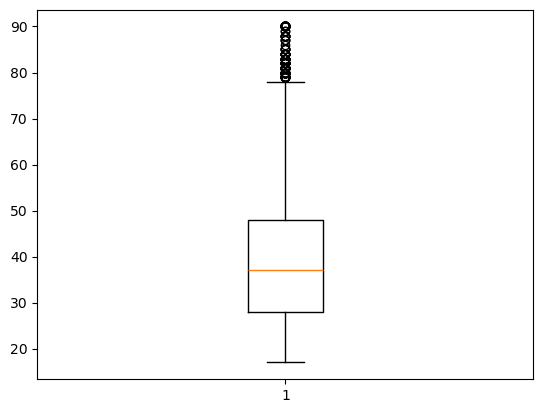

In [31]:
#outlier
#this visualization supports numerical value and not categorical value
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()
#the circles in the graph from 80-90 represents outliers
#A boxplot is a standard way of visualizing the distribution of numerical data and identifying outliers.
#A box representing the middle 50% of ages.i.e the most useful part
#A horizontal line in the box (the median).
#Whiskers extending from the box
#Circles/dots around ages like 80–90 ➝ these are outliers.

In [32]:
#to remove outliers or the least helpful data
data=data[(data['age']<=75)&(data['age']>=17)]

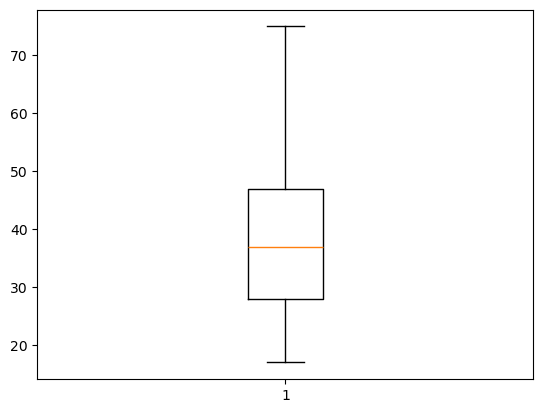

In [33]:
plt.boxplot(data['age'])
plt.show()

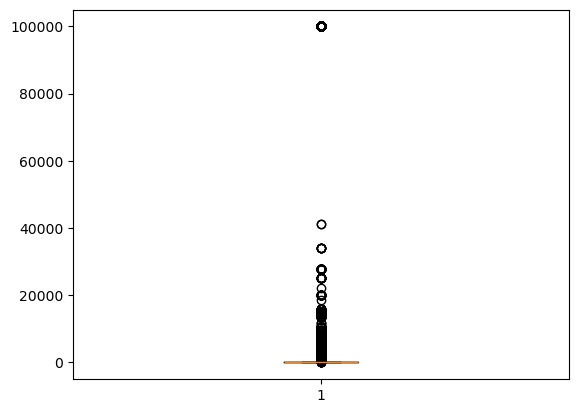

In [63]:
plt.boxplot(data['capital-gain'])
plt.show()

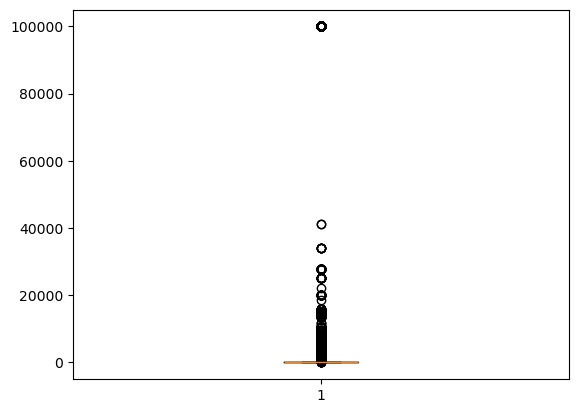

In [64]:
plt.boxplot(data['capital-gain'])
plt.show()

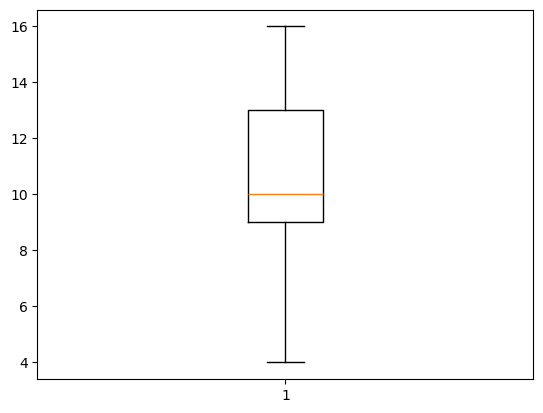

In [65]:
plt.boxplot(data['educational-num'])
plt.show()

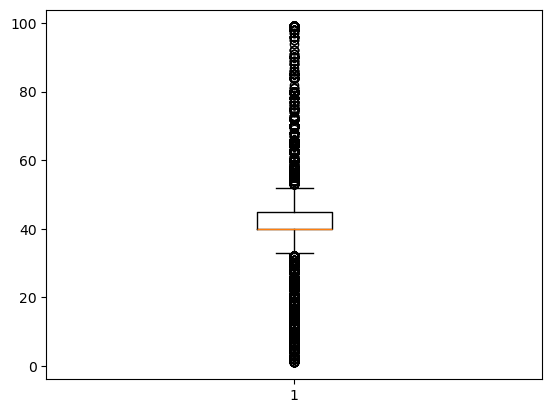

In [66]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [67]:
data.shape

(47604, 14)

In [45]:
data.loc[:, 'workclass'] = encoder.fit_transform(data['workclass'])
data.loc[:, 'marital-status'] = encoder.fit_transform(data['marital-status'])
data.loc[:, 'occupation'] = encoder.fit_transform(data['occupation'])
data.loc[:, 'relationship'] = encoder.fit_transform(data['relationship'])
data.loc[:, 'race'] = encoder.fit_transform(data['race'])
data.loc[:, 'gender'] = encoder.fit_transform(data['gender'])
data.loc[:, 'native-country'] = encoder.fit_transform(data['native-country'])


In [46]:
#spilliting the data
x=data.drop(columns=['income'])#input
y=data['income']#output

In [47]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 47604, dtype: object

In [48]:
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,2,226802,7,4,5,3,2,1,0,0,40,39
1,38,2,89814,9,2,3,0,4,1,0,0,50,39
2,28,1,336951,12,2,9,0,4,1,0,0,40,39
3,44,2,160323,10,2,5,0,2,1,7688,0,40,39
4,18,6,103497,10,4,13,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,2,11,5,4,0,0,0,38,39
48838,40,2,154374,9,2,5,0,4,1,0,0,40,39
48839,58,2,151910,9,6,0,4,4,0,0,0,40,39
48840,22,2,201490,9,4,0,3,4,1,0,0,20,39


In [49]:
data


,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,5,3,2,1,0,0,40,39,<=50K
1,38,2,89814,9,2,3,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,9,0,4,1,0,0,40,39,>50K
3,44,2,160323,10,2,5,0,2,1,7688,0,40,39,>50K
4,18,6,103497,10,4,13,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,2,11,5,4,0,0,0,38,39,<=50K
48838,40,2,154374,9,2,5,0,4,1,0,0,40,39,>50K
48839,58,2,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,2,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [50]:
x = data

In [51]:
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,5,3,2,1,0,0,40,39,<=50K
1,38,2,89814,9,2,3,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,9,0,4,1,0,0,40,39,>50K
3,44,2,160323,10,2,5,0,2,1,7688,0,40,39,>50K
4,18,6,103497,10,4,13,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,2,11,5,4,0,0,0,38,39,<=50K
48838,40,2,154374,9,2,5,0,4,1,0,0,40,39,>50K
48839,58,2,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,2,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [52]:
#spilliting the data
x=data.drop(columns=['income'])#input
y=data['income']#output

In [53]:
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,2,226802,7,4,5,3,2,1,0,0,40,39
1,38,2,89814,9,2,3,0,4,1,0,0,50,39
2,28,1,336951,12,2,9,0,4,1,0,0,40,39
3,44,2,160323,10,2,5,0,2,1,7688,0,40,39
4,18,6,103497,10,4,13,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,2,11,5,4,0,0,0,38,39
48838,40,2,154374,9,2,5,0,4,1,0,0,40,39
48839,58,2,151910,9,6,0,4,4,0,0,0,40,39
48840,22,2,201490,9,4,0,3,4,1,0,0,20,39


In [54]:
#scale the data using scaling techniques
# scaling tries to convert data from a different ranges to a particular range
#there are different types of scaling techniques here we use MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.13793103, 0.33333333, 0.14512876, ..., 0.        , 0.39795918,
        0.95121951],
       [0.36206897, 0.33333333, 0.05245126, ..., 0.        , 0.5       ,
        0.95121951],
       [0.18965517, 0.16666667, 0.21964867, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.70689655, 0.33333333, 0.09446153, ..., 0.        , 0.39795918,
        0.95121951],
       [0.0862069 , 0.33333333, 0.12800425, ..., 0.        , 0.19387755,
        0.95121951],
       [0.60344828, 0.5       , 0.18648211, ..., 0.        , 0.39795918,
        0.95121951]])

In [55]:
#we are going to split the data into training and testing
#1. Training Set
    #This is the data the model learns from.
   #The algorithm finds patterns, relationships, and builds its internal rules using this data.

#2. Testing Set
     #This is kept separate and used only after the model is trained.
      #It helps you evaluate how well your model performs on unseen data, simulating real-world use.


from sklearn.model_selection import train_test_split
xtrain ,xtest ,ytrain ,ytest=train_test_split(x,y,test_size=0.2, random_state=23, stratify=y)

In [56]:
xtrain


array([[0.32758621, 0.33333333, 0.19490229, ..., 0.        , 0.39795918,
        0.95121951],
       [0.77586207, 1.        , 0.11467105, ..., 0.        , 0.14285714,
        0.95121951],
       [0.60344828, 0.33333333, 0.04219902, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.81034483, 0.33333333, 0.18491457, ..., 0.        , 0.39795918,
        0.95121951],
       [0.        , 1.        , 0.08738156, ..., 0.        , 0.04081633,
        0.95121951],
       [0.25862069, 0.33333333, 0.33628304, ..., 0.        , 0.5       ,
        0.04878049]])

In [57]:
#now we are ready for the model to get trained
#machine learning algorithms
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)#input and output training data
predict=knn.predict(xtest)
predict    #predicted value



array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict)

0.8257535973112068

In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)#input and output training data
predict=lr.predict(xtest)
predict    #predicted value #for binary values

array(['<=50K', '>50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict)

0.8210272030248923

In [61]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='adam',hidden_layer_sizes=(5,2),random_state=2,max_iter=2000)
clf.fit(xtrain,ytrain)#input and output training data
predict2=clf.predict(xtest)
predict2    # deep learning

array(['<=50K', '>50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict2)

0.8407730280432728

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.8225
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7169
        >50K       0.72      0.46      0.56      2352

    accuracy                           0.82      9521
   macro avg       0.78      0.70      0.72      9521
weighted avg       0.81      0.82      0.81      9521

RandomForest Accuracy: 0.8572
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7169
        >50K       0.76      0.62      0.68      2352

    accuracy                           0.86      9521
   macro avg       0.82      0.78      0.79      9521
weighted avg       0.85      0.86      0.85      9521

KNN Accuracy: 0.8206
              precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88      7169
        >50K       0.66      0.57      0.61      2352

    accuracy                           0.82      9521
   macro avg       0.76      0.74      0.

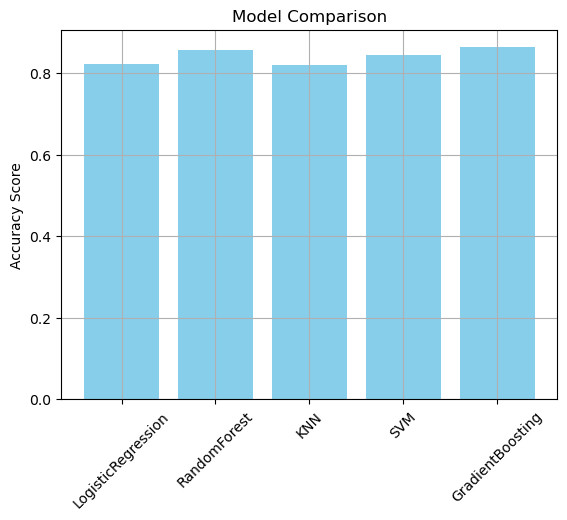

In [73]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


LogisticRegression: 0.8208
RandomForest: 0.8560
KNN: 0.8227
SVM: 0.8443
GradientBoosting: 0.8636

✅ Best model: GradientBoosting with accuracy 0.8636
✅ Saved best model as best_model.pkl


In [75]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs (these must match your training feature columns)
st.sidebar.header("Input Employee Details")

# ✨ Replace these fields with your dataset's actual input columns
age = st.sidebar.slider("Age", 18, 65, 30)
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# Build input DataFrame (⚠️ must match preprocessing of your training data)
input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

st.write("### 🔎 Input Data")
st.write(input_df)

# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')



Writing app.py


In [ ]:
!pip install streamlit pyngrok